m*x'' + gamma*x' +      D*x + E*x^3 = F(t)
  x'' +     g*x' + omega0*x         = f(t)

first order system
i)  x' = f1(t,x,v) = v
ii) v' = f2(t,x,v) = f(t) - g*v - omega0*x - omega1*x^3

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

minima at  -0.7905694150420949 0.7905694150420949


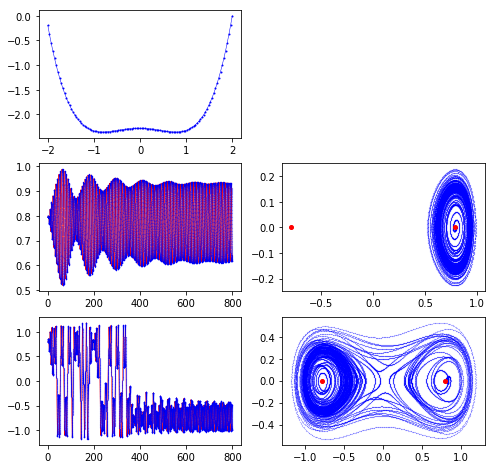

In [66]:
dt    = 0.02
x0    = 0.8
v0    = 0
t0    = 0

m       = 1.0
gamma   = 0.01
D       = -0.5
E       = 0.8
Fmax    = 0.01
extFreq = 1.0


#Runge-Kutta45
def extForce(t,Fmax,extFreq):
    return Fmax*np.sin(extFreq*t)

def f1(x,v,t):
    return v

def forcePotential(x,D,E):
    return -D*np.power(x,1) - E*np.power(x,3)

def getPotentialFromForce(D,E):
    L = 2.0
    n = 111
    x = np.linspace(-L, L, n)
    dx = (max(x)-min(x))/n
    forces = forcePotential(x,D,E)
    potential = -dx*np.cumsum(forces)
    return x, potential

def f2(x,v,t,m,gamma,D,E,Fmax,extFreq):
    extDrivingForce = extForce(t,Fmax,extFreq)
    frictionForce   = -gamma*v
    potentialForce  = forcePotential(x,D,E)    
    return (extDrivingForce + frictionForce + potentialForce)/m

def rungeKuttaStep(x,v,t,m,gamma,D,E,Fmax,extFreq):
    k11 = dt*f1(x,v,t)
    k21 = dt*f2(x,v,t,m,gamma,D,E,Fmax,extFreq)
    k12 = dt*f1(x+0.5*k11,v+0.5*k21,t+0.5*dt)
    k22 = dt*f2(x+0.5*k11,v+0.5*k21,t+0.5*dt,m,gamma,D,E,Fmax,extFreq)
    k13 = dt*f1(x+0.5*k12,v+0.5*k22,t+0.5*dt)
    k23 = dt*f2(x+0.5*k12,v+0.5*k22,t+0.5*dt,m,gamma,D,E,Fmax,extFreq)
    k14 = dt*f1(x+k13,v+k23,t+dt)
    k24 = dt*f2(x+k13,v+k23,t+dt,m,gamma,D,E,Fmax,extFreq)
    x  += (k11+2*k12+2*k13+k14)/6
    v  += (k21+2*k22+2*k23+k24)/6
    return x, v
    
def rungeKuttaIntegration(x,v,t0,m,gamma,D,E,Fmax,extFreq,steps):
    T = []
    X = []
    V = []
    for i in range(steps):
        t = t0+i*dt 
        x,v = rungeKuttaStep(x,v,t,m,gamma,D,E,Fmax,extFreq)
        T.append(t)
        X.append(x)
        V.append(v)
        #print(t,x,v)
    return T,X,V

fig = plt.figure(figsize = (8,8))
ax1 = plt.subplot(3,2,1)
pos,pot = getPotentialFromForce(D,E)
print('minima at ',-np.sqrt(-D/E),np.sqrt(-D/E))
ax1.plot(pos,pot,color='blue', markersize=1,linewidth=0.5, markeredgecolor = 'blue',marker='o')

T,X,V = rungeKuttaIntegration(x0,v0,t0,m,gamma,D,E,Fmax,extFreq,40000)
ax2 = plt.subplot(3,2,3)
ax2.plot(T,X,color='red', markersize=0.1,linewidth=0.5, markeredgecolor = 'blue',marker='o')
ax3 = plt.subplot(3,2,4)
ax3.plot(X,V,color='blue', markersize=0.1,linewidth=0.0, markeredgecolor = 'blue',marker='o')
ax3.plot([-np.sqrt(-D/E),np.sqrt(-D/E)],[0,0],color='red', markersize=4,linewidth=0.0, markeredgecolor = 'red',marker='o')

T,X,V = rungeKuttaIntegration(x0,v0,t0,m,gamma,D,E,5.5*Fmax,extFreq,40000)
ax4 = plt.subplot(3,2,5)
ax4.plot(T,X,color='red', markersize=0.1,linewidth=0.5, markeredgecolor = 'blue',marker='o')
ax5 = plt.subplot(3,2,6)
ax5.plot(X,V,color='blue', markersize=0.1,linewidth=0.0, markeredgecolor = 'blue',marker='o')
ax5.plot([-np.sqrt(-D/E),np.sqrt(-D/E)],[0,0],color='red', markersize=4,linewidth=0.0, markeredgecolor = 'red',marker='o')

